# House Prices - Competition

The object of the competition is to predict the house prices as precisely as possible using database that contains 79 explanatory variables of the residental homes in Ames, Iowa.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Importing needed libraries and data

In [4]:
# Importing needed tools
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Getting the data to train the models
home_filepath = '../input/house-prices-advanced-regression-techniques/train.csv'
home_data = pd.read_csv(home_filepath)

# Getting the data for which we give predictions
test_data_path = '../input/house-prices-advanced-regression-techniques/test.csv'
test_data = pd.read_csv(test_data_path)

## Initial data analysis

In [5]:
home_data.info()
print('************')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Quite a lot of stuff. On my first try I will only consider the numeric features.

In [6]:
numeric_home_data = home_data.select_dtypes(exclude='object')
numeric_home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Choosing features to use

In [7]:
numeric_corr = numeric_home_data.corr()
sale_price_corr_table = numeric_corr['SalePrice'].sort_values(ascending=False).to_frame()
sale_price_corr_table

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Let's choose the ones that correlation with the price is more than 0.25.

In [8]:
features = sale_price_corr_table[(sale_price_corr_table['SalePrice']>0.25) & (sale_price_corr_table['SalePrice']<1)].index.to_list()
home_data[features].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1452.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,1978.506164,103.685262,0.613014,443.639726,70.049958,94.244521,346.992466,46.660274,0.382877,10516.828082
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,24.689725,181.066207,0.644666,456.098091,24.284752,125.338794,436.528436,66.256028,0.502885,9981.264932
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,1900.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,1961.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,7553.500000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1980.000000,0.000000,1.000000,383.500000,69.000000,0.000000,0.000000,25.000000,0.000000,9478.500000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,2002.000000,166.000000,1.000000,712.250000,80.000000,168.000000,728.000000,68.000000,1.000000,11601.500000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,2010.000000,1600.000000,3.000000,5644.000000,313.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000


Let's see how these correlate with each other. If there are terms that correlate with each other a lot, it is not necessary to include them to the features.

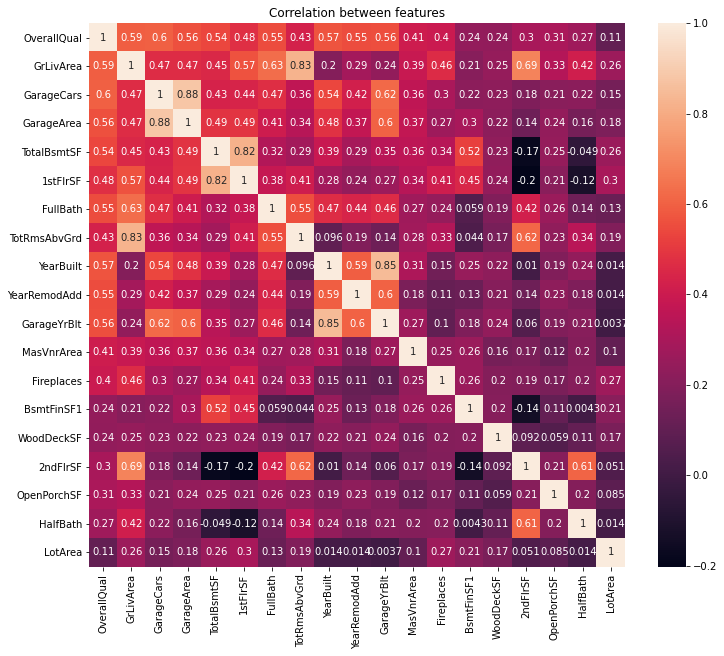

In [18]:
plt.figure(figsize=(12,10))
plt.title('Correlation between features')
sns.heatmap(home_data[features].corr(), annot=True)

So there is a high correlation between GarareCars and GarageArea, TotalBsmtSF and 1stFlrSF, GrLivArea and TotRmsAbvGrd, YearBlt and GarareYrBlt. Therefore I will remove the features: GarageArea, TotalBsmtSF, TotRmsAbvGrd and GarageYrBlt.

In [19]:
features.remove('GarageArea')
features.remove('TotalBsmtSF')
features.remove('TotRmsAbvGrd')
features.remove('GarageYrBlt')

In [ ]:
home_data[features].describe()

In [10]:
home_data['MasVnrArea'].fillna(0, inplace=True)

In [11]:
home_data['GarageYrBlt'].fillna(home_data['YearBuilt'], inplace = True)

In [12]:
home_data[features].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,1976.507534,103.117123,0.613014,443.639726,94.244521,346.992466,46.660274,0.382877,10516.828082
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,26.306739,180.731373,0.644666,456.098091,125.338794,436.528436,66.256028,0.502885,9981.264932
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7553.500000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1978.000000,0.000000,1.000000,383.500000,0.000000,0.000000,25.000000,0.000000,9478.500000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,2001.000000,164.250000,1.000000,712.250000,168.000000,728.000000,68.000000,1.000000,11601.500000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,2010.000000,1600.000000,3.000000,5644.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000


In [13]:
test_data[features].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
count,1459.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1381.000000,1444.000000,1459.00000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.766118,472.768861,1046.117970,1156.534613,1.570939,6.385195,1971.357779,1983.662783,1977.721217,100.709141,0.58122,439.203704,93.174777,325.967786,48.313914,0.377656,9819.161069
std,1.436812,485.566099,0.775945,217.048611,442.898624,398.165820,0.555190,1.508895,30.390071,21.130467,26.431175,177.625900,0.64742,455.268042,127.744882,420.610226,68.883364,0.503017,4955.517327
min,1.000000,407.000000,0.000000,0.000000,0.000000,407.000000,0.000000,3.000000,1879.000000,1950.000000,1895.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1470.000000
25%,5.000000,1117.500000,1.000000,318.000000,784.000000,873.500000,1.000000,5.000000,1953.000000,1963.000000,1959.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7391.000000
50%,6.000000,1432.000000,2.000000,480.000000,988.000000,1079.000000,2.000000,6.000000,1973.000000,1992.000000,1979.000000,0.000000,0.00000,350.500000,0.000000,0.000000,28.000000,0.000000,9399.000000
75%,7.000000,1721.000000,2.000000,576.000000,1305.000000,1382.500000,2.000000,7.000000,2001.000000,2004.000000,2002.000000,164.000000,1.00000,753.500000,168.000000,676.000000,72.000000,1.000000,11517.500000
max,10.000000,5095.000000,5.000000,1488.000000,5095.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000,2207.000000,1290.000000,4.00000,4010.000000,1424.000000,1862.000000,742.000000,2.000000,56600.000000


In [14]:
test_data['MasVnrArea'].fillna(0, inplace=True)
test_data['GarageYrBlt'].fillna(home_data['YearBuilt'], inplace = True)
test_data[features].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
count,1459.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.766118,472.768861,1046.117970,1156.534613,1.570939,6.385195,1971.357779,1983.662783,1977.359836,99.673749,0.58122,439.203704,93.174777,325.967786,48.313914,0.377656,9819.161069
std,1.436812,485.566099,0.775945,217.048611,442.898624,398.165820,0.555190,1.508895,30.390071,21.130467,26.770632,177.001792,0.64742,455.268042,127.744882,420.610226,68.883364,0.503017,4955.517327
min,1.000000,407.000000,0.000000,0.000000,0.000000,407.000000,0.000000,3.000000,1879.000000,1950.000000,1880.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1470.000000
25%,5.000000,1117.500000,1.000000,318.000000,784.000000,873.500000,1.000000,5.000000,1953.000000,1963.000000,1959.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7391.000000
50%,6.000000,1432.000000,2.000000,480.000000,988.000000,1079.000000,2.000000,6.000000,1973.000000,1992.000000,1979.000000,0.000000,0.00000,350.500000,0.000000,0.000000,28.000000,0.000000,9399.000000
75%,7.000000,1721.000000,2.000000,576.000000,1305.000000,1382.500000,2.000000,7.000000,2001.000000,2004.000000,2002.000000,162.000000,1.00000,753.500000,168.000000,676.000000,72.000000,1.000000,11517.500000
max,10.000000,5095.000000,5.000000,1488.000000,5095.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000,2207.000000,1290.000000,4.00000,4010.000000,1424.000000,1862.000000,742.000000,2.000000,56600.000000
